Getting ready to work with the European Blockchain Services Infrastructure (EBSI)
==============

This text is focused on facilitating a dialogue between IT staff / developers and decision makers in organizations. To help the former, the text provides a step by step guide on the use of various tools, libraries and reusable components in order to learn about user controlled authentic data (UCAD) exchanges. The text also introduces and explains the European Blockchain Services Infrastructure (EBSI), which aims to provide a Verifiable Data Registry (VDR) that is jointly maintained and support by the member states to support UCAD. Relatedly, to help decision makers, the text provides an overview of core concepts and helps explain how the various parts of the solution contribute to enabling UCAD. The text will also include tips and suggestions from the past two years of experience working with EBSI, the Toolbox project, and with the Proof of Business project at Bolagsverket.

# About this learning material

Our increasingly digital world is fueled by data. In this emerging data driven world, trust is a key challenge. Trust means 1) ensuring data security and data privacy, 2) having data that is easy to verify, 3) making difficult attempts to forge and tamper with data data and data records, and 4) ensuring that the data subject is in sole and total control over their own data. To distinguish between data exchanges that satisfy these four points and those that do not, this text will refer to the former using the term 'user controlled authentic data' (UCAD). New technologies like those introduced by the European Blockchain Services Infrastructure (EBSI), i.e., distributed ledgers (DLT), and work on Verifiable Credential (VC) formats and proof mechanisms, are all enabling UCAD.

## The focus, aim, and an outline of assumptions

To understand this text on VC and the EBSI, it is helpful to clarify a few points:

1. This text is focused on facilitating a dialogue between IT staff (specialists and developers) and decision makers (who may or may not have a technical background). Consequently, the text will focus on both technical topics and the implications of certain technical choices for decision makers.
2. The assumed context is the public sector. While most parts in the text are context agnostic, the focus on EBSI merits a specific focus on the public sector context.
3. The text was developed following experiences working with VC and EBSI in the Swedish public sector, more specifically with The Swedish Company Registration Offices.
4. The aim is to let developers get hands on experience with key concepts so that they can get familiar with VC and supporting infrastructure.

The motivation for the focus on facilitating a dialogue between IT staff and decision makers was that there already exists educational material on EBSI and on VC targeting either a general audience (cf. the three chapter EBSI Explained series found [here](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSI/What+is+ebsi)) or a technical audience (cf. the [W3C specifications for Verifiable Credentials data model](https://www.w3.org/TR/vc-data-model/), the Linux Foundation [LFS173x course](https://training.linuxfoundation.org/training/becoming-a-hyperledger-aries-developer-lfs173/) on becoming an Aries developer, and/or the [EBSI demonstrator](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/Demonstrator)). However, the VC concept and the infrastructure it relies on (e.g., EBSI) represent (at least in parts) fundamental shifts in how data is managed. And to fully understand these shifts and to realize many of the potential benefits with VC and EBSI, it is important that both technical staff understand the technical requirements and that non technical decision makers are equipped with the required knowledge to allow them to assess the merits of proposed uses of the technology (with a focus on helping decision makers avoid improper uses).

The reason for the public sector focus is due to EBSI. Specifically, the EBSI is a joint initiative from the European Commission and the European Blockchain Partnership with the aim to leverage blockchain to accelerate the creation of cross-border services for public administrations and their ecosystems to verify information and to make services more trustworthy (cf. the [EBP page](https://digital-strategy.ec.europa.eu/en/policies/blockchain-partnership)). It is the focus of EBSI on public administration and public services that motives the focus on the public sector context in this text. Arguably, this context focus does not impact the VC parts of this text. Perhaps the biggest impact is on the adversarial assumptions and how these impact the underlying infrastructure choices of EBSI, which in turn, impacts how trust is established in VC based data exchanges.

The reason for the focus on the experiences of the Swedish Company Registration Offices is due to interest. This text was developed as the end result of a CEF project on EBSI training. Early efforts in the project aimed to map the interest for EBSI and VCs in the Swedish public sector. This mapping exercise revealed that the interest in the Swedish public sector was on a rather general level. The notable exception was the Swedish Company Registration Offices (hereafter referred to by their Swedish name Bolagsverket). Bolagsverket had a strategy to decentralize information flows related to organizations and a vision to let the organizations be in control of their respective flows. Bolagsverket also wanted to explore EBSI and to learn how to leverage the infrastructure's capabilities to deliver public services. Finally, Bolagsverket had other blockchain initiatives and a project focused on VC and EBSI would reach a broad audience in the Swedish public sector since many actors follow closely the work Bolagsverket does. 

Finally, the aim to improve knowledge though hands on experience means that large portions of this text will be developed around mature projects that developers can use as a foundation for testing and trailing UCAD. This means that most of the exercises and the work done here will leverage the following three Hyperledger open source projects: [Aries](https://www.hyperledger.org/use/aries), [Ursa](https://www.hyperledger.org/use/ursa), and [Indy](https://www.hyperledger.org/use/hyperledger-indy). Together, these projects provide libraries, tools, and reusable components for creating decentralized applications for UCAD. Most major enterprise focused UCAD projects today leverage the three Hyperledger projects (e.g., the [Hyperledger Labs project Business Partner Agent](https://github.com/hyperledger-labs/business-partner-agent) and the [OrgBook BC project](https://www.orgbook.gov.bc.ca/search) that has issued over 4 million VCs to date) and there is extensive documentation and developer support and training. In particular, Aries helps developers work with different VC formats and the protocols required to establish secure connections and to exchange UCAD. In turn, Ursa is a cryptographic library that supports certain cryptographic primitives and algorithms that are specifically designed with user privacy in mind. Finally, Indy provides the required infrastructure to anchor trust in a decentralized and verifiable data registry. This fourth point is particularly relevant to discuss as it represents a compromise between developer friendly material and relevance for decision makers.

## Learning with the Hyperledger projects Aries, Ursa, and Indy: Benefits and words of caution

The needs of IT staff and developers trying to learn about VC and DLT differ from that of decision makers. The examples in this text are mainly based on the three aforementioned Hyperledger projects Aries, Ursa, and Indy. The reason for this choice is twofold. The three Hyperledger projects are comparatively far more mature than EBSI and its VC ecosystem. Together, the projects have over 44 000 commits from 650 code contributors (for up to date information use https://insights.lfx.linuxfoundation.org/projects/health). Furthermore, the three Hyperledger projects have been used as a foundation for several large scale pilots and many organizations have relied on them for their trial and proof of concept needs. And the choice of DLT specifically, or verifiable data registry (VDR) in general, is not necessarily an important consideration for developers or policy makers attempting to understand UCAD. What matters is that there exists a VDR that can act as a trust anchor. This text is focused on helping IT staff and developers communicate with decision makers, and the communication regarding the choice of VDR is rather trivial for IT staff and developers (often as simple as changing a few lines in a configuration file or picking a certain API and using the right access tokens, neither is important for understanding VC and EBSI).

In essence, focusing on Aries, Ursa, and Indy allows developers to quickly develop and test VC solutions for UCAD. This includes:

* Establishing and managing secure connections between entities without having to rely on central servers or passwords
* Send and receive messages with high security and privacy
* Request and obtain, store, select, combine and share, the attribute attestations necessary for consuming a services
* Create an agent that represents the identity subject in the cloud or on edge devices
* Manage authorizations and cryptographic key material

There are, however, certain contextual factors that make the a focus on the three Hyperledger projects questionable. Perhaps most important is that [Verifiable Credentials come in many flavors](https://www.lfph.io/wp-content/uploads/2021/04/Verifiable-Credentials-Flavors-Explained-Infographic.pdf). The ones initially developed for Aries were developed with a strong emphasis on privacy. And this strong privacy focus was realized using relatively complex cryptography. For the private sector, the adversarial assumptions may warrant such a high focus on privacy for UCAD exchanges. But for the public sector, using complex cryptography has several limitations and it is arguable that the costs are worthwhile considering how the public sector context is a very different adversarial environment than is the private sector. It is questionable to assume a malicious public actor since these actors are often the authorized sources of UCAD and the principle providers of services and infrastructure. 

For the public sector, it makes a lot more sense to optimize for ease of implementation and to use cryptography that public sector actors are very familiar with. Especially considering how both EBSI and the ongoing work in the common union Toolbox for a coordinated effort toward a European digital identity framework (cf. [C/2021/3968](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32021H0946)) are likely to focus on UCAD enabled using less complex cryptography (e.g., [EBSI only requires ES256](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/E-signing+and+e-sealing+Verifiable+Credentials+and+Verifiable+Presentations), which is [basic ECDSA with P-256 and SHA-256](https://ldapwiki.com/wiki/ES256)). Consequently, the text herein will more elaborately explain how to enable UCAD using ES256 and focus more on the technologies that both the Toolbox group and the EBSI group is emphasizing for use in the public sector.

Another important consideration is that EBSI is a DLT agnostic platform. At the writing of this document, EBSI supports two DLTs: [Hyperledger Besu](https://www.hyperledger.org/use/besu) and [Hyperledger Fabric](https://www.hyperledger.org/use/fabric). Besu is an Ethereum client specifically designed for enterprise and consortium environments. Since this text is educational, ease of use is prioritized. Using a general purpose DLT like Ethereum is less attractive than using a DLT purpose built for VC support and UCAD. 

Hyperledger Indy is a DLT similar to Hyperledger Fabric, but unlike Fabric's general purpose focus, Indy is designed specifically for UCAD. So, while EBSI does not support an Indy based ledger, it is easier to use an Indy based DLT as a VDR for learning purposes. The alternative is to: 1) develop the necessary functionality using a development environment for Ethereum, or 2) wait for EBSI to become production ready with full feature support. And while the work is rapidly progressing, and the list of [EBSI conformant wallets](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSI/Conformant+wallets) keeps growing, there is still a lot of features missing on EBSI. Also, most EBSI conformant wallets are still focused on Desktop and/or mobile and not server environments, the latter being more suitable for our organization focused context. Also, the test suites for EBSI, the wallets, and the conformance tests are far less suitable for development and learning than their Aries equivalents. 

Aries thus offers both a solution for Enterprise environments called [Hyperledger Aries Cloud Agent Python](https://github.com/hyperledger/aries-cloudagent-python), or ACA-Py for short, and simpler [interoperability testing](https://aries-interop.info/acapy.html). It is also far more mature and most enterprise tests have been developed using ACA-Py. A few words of caution are in order here:

* Most Aries based implementations do not support any of the formats and proof mechanisms that EBSI currently supports. Aries initially focused on supporting the AnonCreds VC format and relied on Indy as a VDR. In Q4 2020, focus shifted to also support other ledgers and VC formats, most notably the VC format W3C JSON-LD ZKP with BBS+ signatures. By Q1 2022, Aries offered full support for AnonCreds and W3C VC in JSON-LD ZKP using BBS+.
* Multimessage signature schemes, such as CL (used in AnonCreds) and BBS+, is very different from the signatures schemes that the public sector is used to work with. Neither EBSI nor the Toolbox group is currently supporting it.
* As of Q1 2022, efforts in Hyperledger Aries are shifting away from the W3C VC data model. The reason for this is practical (cf. the Q1 report [here](https://wiki.hyperledger.org/display/TSC/TSC+Project+Updates)). Many who want to deploy solutions quickly and test out VC and DLT, appreciate the full stack solution that is AnonCreds. To this end, work ins progressing on developing an [open specifications for the AnonCreds VC format](https://anoncreds-wg.github.io/anoncreds-spec/). 
* The Q2 2022 update reiterates that support for W3C standard VCs are still in progress and that developers wanting quick development should focus on AnonCreds.  

Succinctly put: using Aries, Ursa, and Indy is very helpful if the main goal is learning about VC and how decentralized infrastructures like EBSI can support UCAD. Experiences from both Bolagsverket and from other enterprise focused UCAD projects have shown that AnonCreds is highly suitable for deploying solutions quickly. There is still a lot of development efforts ongoing with EBSI, and organizations would do well to keep up to date with recent developments. The assumption that underlies the text herein is that an organization can use Aries, Ursa, and Indy to get familiar with the core concepts, and thus be far more able to onboard EBSI once EBSI becomes mature.

## Disposition

This text will be structured as follows. First, the VC model is introduced both in general and with a specific focus on how the EBSI VC lifecycle looks like. The text aims to explain not only the model, but also the problem the model was introduced to solve. Common concepts and key terms will be described, followed by an introduction of the Trust Over IP (ToIP) stack. By the end of this first VC focused section, decision makers should be able to understand what VC and DLT enables and be ready to have a discussion with their IT colleagues on how to realize UCAD and how to leverage EBSI.

Then, the text takes a technical deep dive into many core concepts required for developers to navigate VC and DLT in general, and EBSI VC specifically. In this section, the text describes each layer of the ToIP stack more in-depth. The text details also how Aries and Aries agents work and covers the major solution components of an UCAD ecosystem. Special attention will be given to help developers set up a test network for rapid development and quick deployment. Again, the focus is on enabling learning. This section will include also a description of EBSI conformant wallets and what EBSI services are usable today. This section will also explain major differences between Aries and the likely direction that EBSI is heading (e.g., with respect to revocation etc.).

Finally, we focus on the controller component for UCAD. The controller is the organization specific codified business logic that provides an interface between the organization's existing systems and an UCAD ecosystem. This chapter will use ACA-Py and the Bolagsverket case as an exmaple.

Throughout the text, there will be a strong emphasis on labs and active development and using code as a pedagogical tool for learning about VC and DLT.

# Verifiable Credentials

*Note: Unless otherwise specified, the definitions for concepts used in this text are from here: https://www.w3.org/TR/vc-data-model/#terminology*

## Credentials

The term credential has been defined in several ways, and the definition has evolved over time, which has lead to some degree of confusion. In [early work on VC](https://docs.google.com/document/d/1gfIz5TT0cNp2kxGMLFXr19x1uoZsruUe_0glHst2fZ8/edit#heading=h.jgdxyglhz3ik), the term credential was defined as "a digital assertion containing a set of Claims made by an Entity about itself or another Entity". These credentials were handled by different actors within a UCAD ecosystem, and the [Sovrin Glossary](https://docs.google.com/document/d/1gfIz5TT0cNp2kxGMLFXr19x1uoZsruUe_0glHst2fZ8/edit#heading=h.lyw4rdm1mutj) and the [W3C VC data model](https://www.w3.org/TR/vc-data-model/#ecosystem-overview)  both identify the following actors:

* The entity described by the claims is the **credential subject**.
* The entity creating the credential is the **credential issuer**.
* The entity who controls and holds the credential is the **credential holder**.
* The entity who uses Zero Knowledge Proofs to present a claim contained within a credential is called the **credential prover**.
* The entity to whom the credential is presented is called a **Relying Party** or, if the credential is a VC, a **verifier**.

In the context of the public sector, the [eIDAS legal framework](http://timspeelman.nl/eidas/#A3(52)) defines credential as "a proof of a persons abilities, experience, right or permission". The term in eIDAS that most closely resembles the Sovrin definition of a credential is 'electronic attestation of attributes' (EAA). The term [EAA](http://timspeelman.nl/eidas/#A3(44)) is defined as "an attestation in electronic form that allows the authentication of attributes" where an [attribute](http://timspeelman.nl/eidas/#A3(43)) is "a feature, characteristic or quality of a natural or legal person or of an entity, in electronic form". In this text we will not use the legal meaning of the word, but instead use credential and EAA interchangeably.

There is also a distinction to be made between the credentials and verifiable credentials. Existing physical credentials, like a driver's license, contain information about 

* The type of the credential, i.e., driver's license.
* The government authority that issued the credential.
* The rights assigned to the identity subject of the driver's license (the credential subject and often holder).
* Other claims about the credential holder
* Information related to constraints on the credential, e.g., a validity period.

When consuming services, the holder can show the driver's license to make assertions about claims like age, driving rights, or identity. Ideally, a credential contains information about the issuer and claims about the credential subject, and protects this information from being altered in some way. A VC shares many similarities with a physical credential, but also different in several important ways.

## The VC data model

A VC is similar to its physical counterpart insofar that:

* An authorized issuer issues a VC containing claims about a credential subject.
* The credential subject can hold the credential in their digital wallet.
* A verifier can ask the holder to prove the claims from the credential.
* The holder can generate a verifiable presentation, which includes information about the issuer and a proof that the shared claims are not forged.
* The issuer can, if the credential supports it, also prove that the credential is still valid.

Unlike their physical counterparts, a VC is cryptographically constructed, meaning that the evaluation of a credential is based solely on cryptography and not on the relying party's ability to spot a fake credential. The holder can use cryptography to generate a presentation that proves:

* Who issued the credential.
* That the credential was issued to the entity presenting it.
* That the claims were not tampered with.
* That the credential has not been revoked.

One major advantage a VC has over a physical credential is that a VC can use cryptography to prevent 'oversharing' of data and thereby protect the privacy of the credential subjects. For instance, using a VC it is possible to derive an "age over 18" proof from the birth date, as opposed to disclosing the birth date in full. Using a VC, it is possible also to select specific claims to present, as opposed to having to show all of the claims. A core principle behind UCAD is that the credential subject / holder is in control of what data is shared and with whom.

Above, the issuer, holder, and verifier were explained. There is one more important part of the VC ecosystem: The VDR. Most VC contain pointers to a VDR. The verifier can use a VDR to access information on the issuer and ensure they are an authorized source of the claims contained in the VC. The verifier can also use a VDR to access schemas and definitions, cryptographic material necessary to verify claims, and to perform validity status checks.

<img src="https://www.w3.org/TR/vc-data-model/diagrams/ecosystem.svg" alt="VC data model" width="600"/>

**Fig 1**. *The Verifiable Credentials Data Model.*

Above, the text has explained the various roles involved in a VC ecosystem and mentioned some of the properties of VC. Experiences show, however, that it is not always easy to know how to use these properties in real use cases and how the various roles interact. These topics are explored next.

## When to use VC

On an aggregate level, use cases are comprised of needs, roles, tasks, and sequences. User needs define the problem space. The roles are the aforementioned issuer, holder, and verifier. The tasks define the functions that a users can accomplish using VC (e.g., selective disclosure of claims/attributes, generate proof of validity etc.). The sequences explain how a task is realized in interaction between the various actors involved. 

The W3C Use Case working group has identified a few illustrative needs that a user may have in different domains:

<img src="https://www.w3.org/TR/vc-use-cases/VerifiableCredentialsProblemDomains.png" alt="VC data model" width="900"/>

**Fig 2**. Example of user needs in various domains.

Each user need is further explained on the [W3C Use Case page](https://www.w3.org/TR/vc-use-cases/#user-needs). In this text, we will often illustrate concepts using education and legal identity. Therefore it is helpful to provide a short description of these two domains:

* The *education* domain includes all levels of the educational experience; from primary through professional continuing education.
* The *legal identity* domain includes cases where an entity must be able to prove some aspect of their identity in a way that can be quickly verified. Governments and other widely recognized entities are well positioned to provide such identification in a verifiable digital form.

The use cases that are explored within EBSI will be detailed later in this text. To understand the detailed EBSI use cases, it is helpful to first understand a how to use VC, what a VC can look like, the involved flows, and how VC relates to verifiable presentations. 

## How to use a VC

Above, the user needs and the roles were discussed. Here, the text describes the tasks. These are important in order to understand the core principles behind VC.

Core tasks include:

1. **Issue a VC containing at least one claim**. Any entity must be able to issue a VC and include any claim. It is up to the verifier to assess the trustworthiness of a claim based on the issuer. For instance, a driver's license issued by the authorized agency has high trustworthiness. The same VC issued by the credential subject has low trustworthiness.
2. **Assert a claim**. Most VC contain several claims.  The holder of a VC must be able to share exactly the information it intends with a verifier, and nothing else. The holder must also be able to limit the duration for the sharing of claims. 
3. **Verify a claim**. The verifier must be able to verify that the VC is an authentic statement of an issuer's claim about the subject. This requires the verifier to be able to:
    * bind the holder to the presented claim(s), 
    * detect any tampering
    * connect the VC to the issuer
    * verify the authenticity of the VC
4. **Store and manage claims**. The holder must be able to store the VC in a credential repository and the holder must be able to move credentials between credential repositories without requiring re-issuance.
5. **Share claims**. The holder must be able to select what claims from what VCs to share with a verifier.
6. **Revoke claim**. The issuer must be able to revoke a claim included in a VC.

Perhaps the best way to illustrate the above tasks is to provide examples of a few scenarios that are difficult to achieve using existing credentials. These examples come from the [focal use case](https://www.w3.org/TR/vc-use-cases/#focal-use-cases) descriptions at the W3C use case working group.

**Example 1. Claiming citizenship by parentage**

Sam wants to claim US citizenship and his mother is American. Sam has a digital birth certificate from Kenya, where he was born. He also has his mother's digital US passport. His mother’s name changed between his birth and the issuance of the passport, so Sam also has a marriage license with her maiden and married names. Sam is applying for a new passport from the US Secretary of State.

Sam can prepare the following VC set:

* Birth certificate. Links Sam to his mother's maiden name.
* Marriage license. Links the mother's maiden name with the present name.
* Mother's passport. Establishes mother's US citizenship.
* Sam's existing passport.

Using the above VC set, Sam can prepare a verifiable presentation that selects claims from each of the above VCs and establishes that Sam is the credential subject (using e.g., a photo or other biometric data on his passport), that Sam is the child in the birth certificate, that the mother in the birth certificate is the same entity as the credential subject in the mother's passport VC and the marriage certificate.

From a privacy perspective, it makes little sense to privacy preserve Sam's identity in this case since the claims he shares uniquely identify him. However, there are still some privacy aspects to consider. For instance, it should not be possible for the issuer of a VC to know that Sam is using the VC.

**Example 2. Expert dive instruction**

Pat earned multiple diving credentials while living and working in Fiji and Australia. Pat is now applying for a job as a NOAA Dive Instructor, which requires certification as an instructor with additional specialist diver certifications in dry suit, night diving, and search and recovery.

Pat can prepare the following VC set:

* Dive Instructor certification
* Dry suit certification
* Night diving certification
* Search and recovery certification
* Pat's existing legal identity credential

Using the above VC set, Pat can prepare a verifiable presentation that establishes all the VC have the same credential subject and that he is that credential subject.

**Example 3. International travel with minor and upgrade**

Malathi is traveling internationally with her 8-month-old son, Anand. Malathi has enough frequent flyer miles to upgrade the ticket to first class.

Malathi can prepare the following VC set:

* Malathi's passport. Used in conjunction with the birth certificate.
* Anand's passport. Used in conjunction with the birth certificate.
* Anand's birth certificate. Used in conjunction with the passports.
* Upgrade coupon. Used in conjunction with Malathi's passport.

Malathi can now create a verifiable presentation that establishes that she is the mother of Anand and that she desires to use the upgrade coupon.

## What a VC looks like

As mentioned, there are many types of VC formats. Below is a commented example of a W3C VC in JSON-LD (a more visual example will follow). The content mirrors Example 3. above, i.e., Malathi's passport.

```JSON
{
  // set the context to provide information on the terms used
  "@context": [
    "https://w3id.org/credentials/v1",
    "https://example.com/travel-vocab/v1"
  ],
  // specify the identifier of the VC
  "id": "urn:uuid:9f6878c8-73c7-11e8-ab37-23a1a3504fd0",
  // state the VC type, which declares what data to expect
  "type": ["VerifiableCredential", "PassportCredential"],
  // the issuer's identifier (DID) available on VDR "example"
  "issuer": "did:example:CCnF3zFaXkPN4zB94XaomRdvw2zX3XHPVX3aExcgo6PV",
  // some information about issuance, validity, and the subject
  "issuanceDate": "2010-01-01T19:23:24Z",
  "expires": "2028-01-01T00:00:00Z",
  "credentialSubject": "did:example:BcRisGnqV4QPb6bRmDCqEjyuubBarS1Y1nhDwxBMTXY4",
  // state the claims
  "claim": {
    // identifier of the credential subject, which is the same as above
    "id": "did:example:BcRisGnqV4QPb6bRmDCqEjyuubBarS1Y1nhDwxBMTXY4",
    "passport": {
      "id": "urn:uuid:79c181dc-73c7-11e8-8c1f-2bb1fd2d268a",
      "type": "Passport",
      "traveler": {
        // note that traveler is also credential subject
        "id": "did:example:BcRisGnqV4QPb6bRmDCqEjyuubBarS1Y1nhDwxBMTXY4",
        "givenName": "Malathi",
        "familyName": "Hamal",
        "citizenship": "US"
      },
      /* any other passport fields */
    }
  },
  // validity information expressed below
  "credentialStatus": {
    "id": "https://example.gov/status/24",
    "type": "CredentialStatusList2010"
  },
  "proof": {/* Signature by authorized issuer and associated metadata */}
}
```

It is helpful to break down the example above into the core concepts used in the VC data model as defined by the W3C. At its core, the VC data model describes how claims can be made and how they are included in a VC. A claim is a statement about a subject expressed in a **subject-property-value** relationship. In the example above, there are several claims. For instance:

* Malathi (subject) is a citizen of (property) the US (value).
* The VC (subject) is of type (property) Verifiable Credential and Passport Credential (value).

Every VC contains at least one claim. In addition, the VC contains also at least one proof and optional metadata. The metadata can describe the issuer, validity information (in the example above expressed as `credentialStatus`), verification related information (e.g., information on where to locate a verification key) etc. The proof is a signature over the claims part (and optionally the metadata part if present). The proof can be either included in the data object as a [Linked Data proof](https://www.w3.org/TR/vc-data-model/#data-integrity-proofs) or as a [JSON Web Token](https://www.w3.org/TR/vc-data-model/#json-web-token). For instance, consider the following illustrative graph of an example VC (note that this example is different from the JSON-LD example of Malathi's passport above).

<img src="https://www.w3.org/TR/vc-data-model/diagrams/credential-graph.svg" alt="Information graphs showing the basics of a VC" width="700">

**Fig 3.** Information graphs showing the basics of a VC.

In the graph, the VC identifier has the value `Credential 123`. This example VC is of type `AlumniCredential`, contains the issuer information `Example University`, and the issuance date, and a single claim; that Pat (subject) is an alumni of (property) Example University (value). Finally, the graph contains the proof part. The signature identifier is `Signature 456`. This example signature is of type `RsaSignature2018`, has the value specified in `signatureValue`, and contains a nonce together with information about how to verify it (using Example University public key 7).

Note how a W3C JSON-LD VC is rather self contained. Not only does it contain pointers to information on how to interpret each term (in the `@context` section), it also provides all the required information to process all contained claims and to verify the entire VC. 

* Statements about specific things can be tagged with the optional `id` property so that interacting actors know they are expressing statements about the same things. 
* The mandatory `type` property lets software systems know whether or not the provided document is appropriate. 
* The mandatory `credentialSubject` property identifies the credential subject.
* The mandatory `issuer` property identifies the issuer of the VC.

As aforementioned, not all VC formats use JSON-LD. Some store context information outside the VC and rely on regular JSON. Others include linked data, but use another logic to structure the data and format it (e.g., the ISO/IEC 18013-5 mdoc format uses CBOR). This text is not focused specifically on JSON-LD. Interested readers should read the section on [basic concepts](https://www.w3.org/TR/vc-data-model/#basic-concepts) in the W3C VC data model page for additional details.

## The flows involved in issuing and using a VC

Below are two sequence diagrams. The first illustrates an example credential issuance.

In [1]:
#!pip install IPlantUML
import iplantuml

Writing output for /home/jovyan/work/5e8db307-1914-4d56-b825-e19a04382add.uml to 5e8db307-1914-4d56-b825-e19a04382add.svg


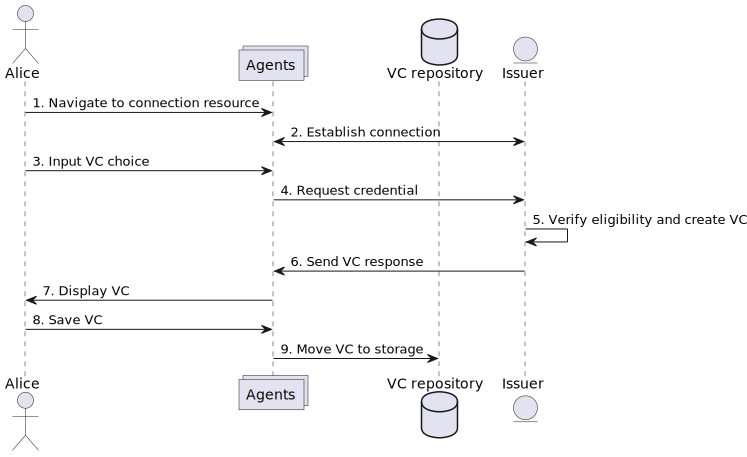

In [11]:
%%plantuml

@startuml
actor Alice as Al
collections Agents as Ag
database "VC repository" as S
entity Issuer as I
Al -> Ag: 1. Navigate to connection resource
Ag <-> I: 2. Establish connection
Al -> Ag: 3. Input VC choice
Ag -> I: 4. Request credential
I -> I: 5. Verify eligibility and create VC
I -> Ag: 6. Send VC response
Ag -> Al: 7. Display VC
Al -> Ag: 8. Save VC
Ag -> S: 9. Move VC to storage
@enduml 

Expanding on the above steps:

1. Alice navigates to a resource where the issuer has provided connection information.
2. Alice's edge agent (assuming she uses her smart phone) uses the connection information to establish a secure connection between itself and the issuer.
3. Alice selects the VC she wants to receive.
4. Alice's agents (oftentimes an edge agent works together with a cloud agent) creates a VC request and sends this secure to the issuer
5. The issuer verifies Alice's eligibility for the VC and (assuming Alice is eligable) creates the VC
6. The issuer sends the VC to Alice's cloud agent
7. Alice's agents show the VC to Alice
8. Alice selects save VC
9. Alice's agents move the VC to the VC repository

Next, we look at VC usage.

Writing output for /home/jovyan/work/3114acdf-9a66-4518-8973-6c0442881cee.uml to 3114acdf-9a66-4518-8973-6c0442881cee.svg


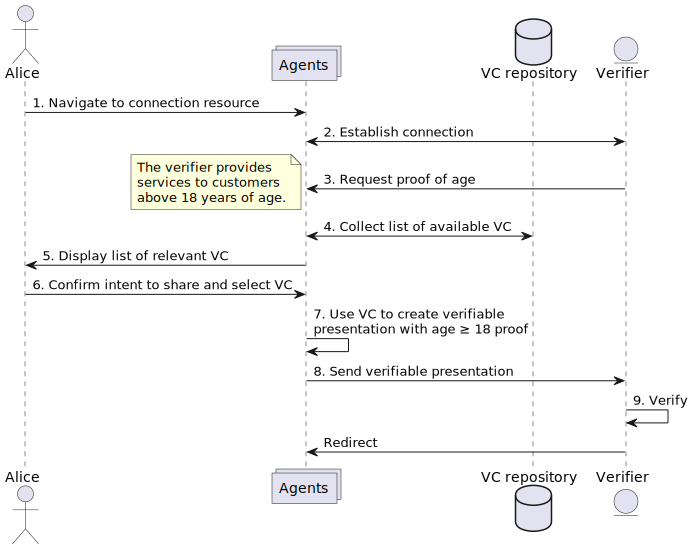

In [19]:
%%plantuml

@startuml
actor Alice as Al
collections Agents as Ag
database "VC repository" as S
entity Verifier as V
Al -> Ag: 1. Navigate to connection resource
Ag <-> V: 2. Establish connection
V -> Ag: 3. Request proof of age
note left
    The verifier provides 
    services to customers 
    above 18 years of age.
end note
Ag <-> S: 4. Collect list of available VC
Ag -> Al: 5. Display list of relevant VC
Al -> Ag: 6. Confirm intent to share and select VC
Ag -> Ag: 7. Use VC to create verifiable\npresentation with age ≥ 18 proof
Ag -> V: 8. Send verifiable presentation
V -> V: 9. Verify
V -> Ag: Redirect
@enduml 

Expanding on the above steps:

1. Alice navigates to a resource where the issuer has provided connection information.
2. Alice's edge agent (assuming she uses her smart phone) uses the connection information to establish a secure connection between itself and the verifier.
3. The verifier requests a proof of age to
4. Alice's agents work with the VC repository to create a list of possible VCs Alice can use to satisfy the verifier's request
5. Alice's agents work together to display this list to Alice
6. Alice confirms the intent to share the claim and selects the VC to use
7. Alice's agent(s) use the VC(s) to create a verifiable presentation with a proof that alice is above 18
8. Alice's edge agent sends to verifiable presentation to the verifier
9. The verifier verifies the claim
10. The verifier sends a redirect to Alice's device.

Note that both sequence diagrams included the term 'verifiable presentation'. This term will be explored next.

## A note on Verifiable Presentations

A VC is not the same as a verifiable presentation. And it is often not enough for a verifier to simply receive a VC. Some reasons for this include:

* Verifiers need assurances that the credential holder actually intended to share the claims contained in the VC.
* A VC may contain more information than what the user intended to share.
* In the examples provided above, the holder often needed to link together difference VCs. But a VC does not include a proof of holder binding between claims shared from multiple different VC.
* A holder may want to specify terms of use for the claims shared.

Consequently, a verifiable presentation may be used to combine and present VC data. The data in a presentation may be about the same credential subject, but it is possible to create presentations involving multiple credential subjects (for instance, the example flow above with Claiming citizenship by parentage involved a verifiable presentation with two credential subjects, the applicant and the mother of said application).

Below is an illustrative information graph for a verifiable presentation. Note how this graph builds on the previous example of a VC.

<img src="https://www.w3.org/TR/vc-data-model/diagrams/presentation-graph.svg" alt="Information graph showing the basics of a verifiable presentation" width="700">

Fig 4. Information graphs showing the basics of a verifiable presentation.

## The VC lifecycle

The VC lifecycle depends on the implementation and the VC format. This section will first describe the generic steps involved, before focusing on how the VC lifecycle looks like in EBSI. In general, the VC lifecycle consists of:

1. The issuer can issue each VC exactly once to the holder.
2. The holder can:
    1. delete each VC exactly once.
    2. transfer a given VC any number of times
    3. present claims from a VC any number of times
3. The verifier can perform a validity status check on the VC any number of times. 

The issuer and the holder activities are rather straight forward. However, the specifics of how to perform a validity status check is ecosystem specific. Some, like eIDAS are encouraging privacy preserving options and flows where validity status checks are performed without the issuer being notified about the use of the VC. 

In EBSI the generic VC lifecycle is based on the W3C specifications, but is purpose fit. Before describing the [EBSI VC lifecycle](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/Verifiable+Credentials+Lifecycle), it is necessary to know that EBSI defines a fourth role in addition to the regular roles (i.e., issuers, holders, and verifiers). The EBSI VC ecosystem also includes the Trusted Accreditation Issuer (TAI). The TAI accredits the issuers to issue an EBSI VC. The reliance of a TAI means that, while anyone could issue a VC, only those issuers accredited by a TAI will be able to issue EBSI VC. As aforementioned, verifiers are tasked with assessing whether or not to trust a VC, and doing a check on the issuer is a key part of a verifier's assessment. For a VC to be consider an EBSI VC, it needs to issued by a TAI accredited issuer.

For the EBSI VC to work, a TAI needs to:

* register a self generated DID and the cryptographic material required for connection establishment and credential verification on a VDR that EBSI supports.
* establish a trust model for their domain. 
* define schemas and manage these schemas using the Trusted Schemas Registry.
* issue Verifiable Accreditations to Accreditation issuers and VC issuers.

For the EBSI VC to work, a TAI accredited trusted issuer needs to:

* obtain Verifiable Accreditations from TAI
* register a self generated DID and the cryptographic material required for connection establishment and credential verification on a VDR that EBSI supports.
* register and manage their Verifiable Accreditations to the EBSI Trusted Issuers Registry.
* issue VC to holders
* E-seal VC

For the EBSI VC to work, a holder needs to:

* generate DIDs and cryptographic keys in their wallets.
* identify trusted issuers using the EBSI Trusted Issuers Registry.
* request EBSI VC from TAI accredited trusted issuers.
* share their EBSI VC with verifiers using verifiable presentations.

Finally, verifiers can:

* request EBSI VC from holders
* verify the verifiable presentation and the claims contained within.
* verify issuers and their accreditation status.

Note how the steps include the generic issuer holder verifier interactions, but that the specific way trust is established is purpose fit for the context that EBSI was designed for. Note specifically how the EBSI ecosystem limits EBSI VC issuance to TAI accredited entities. This gives verifiers in the EBSI ecosystem a way to assess whether or not to trust an EBSI VC.

Later in this text, we will do a technical deep dive into how EBSI works.

## EBSI VC use cases


Above, the text has described the following:

* the VC data model, 
* when and how to use a VC, 
* the VC ecosystem components and participants and their interactions, 
* what a VC can look like, 
* the generic VC lifecycle, and 
* the EBSI VC specific adaptations. 

It is now suitable to introduce the various EBSI VC use cases. On the EBSI confluence page, there are currently 7 use cases described. These are: 1) the European Self-Sovereign Identity Framework (ESSIF), 2) Diplomas, 3) Document traceability, 4) Asylum process management, 5) European Social Security Pass (ESSP), 6) SME financing, and 7) Trusted data sharing. In addition, there are other use cases that have applied for formal EBSI use case status. These use cases are: unique building identity, compliance, vehicle management, supply chain visibility, immunization, trust networks for SME, immigration control, health insurance cards, markets for media assets, public procurement, debt and equity financing, project service infrastructure, driving license, fraud prevention, eHealth, sustainable cities, and tourism. A few of the proposed use cases will be described next, followed by a more in depth description of the adopted EBSI use cases.

### Proposed EBSI use cases

The following are the proposed use cases for EBSI that have so far not been adopted. The described use cases are selected based on the order they appeared on the EBSI application page (and as such were not handpicked to make a point). Together, the three are representative of a broader theme in all applications, i.e., using EBSI for either identity or as a coordination tool for enabling trusted data exchanges in complex and dynamic networks.

#### Unique Building Identification

**The use case in brief**:  Develop a Unique Building Identification (UBI) and use if as the backbone of an information infrastructure where monitoring and construction data is shared between stakeholders.
**Claimed benefit with EBSI**: Building monitoring data and construction data comes from a wide range of sources and from different countries. These data need to be pooled together for further analysis. But analysis is not possible if the data is not trustworthy. The use of EBSI VC to establish UBI is a way to establish trust.

#### Compliance by design

**The use case in brief**: Develop a system in which (financial) processes can be executed in a way that is always completely compliant with all applicable laws and regulations. Three main functions: 1) compliance through enforcement of laws and regulations, 2) simplify accountability by performing audits ex ante, and 3) combine and analyze information to allow traceability of public funds.
**Claimed benefit with EBSI**: The use case is not VC related but proposes using Ethereum smart contracts on the Hyperledger Besu network that runs on EBSI.

#### Management of a vehicle's lifecycle

**The use case in brief**: To gather all relevant information along the lifecycle of a car across organizations and states and to establish a way to generate a transparent, trustworthy, and verified vehicle history report. To do so, the use case describes a need for secure and reliable data exchanges with customizable data ownership. A key enabler for all is to have a way to establish unique identities for entities (vehicles, parts, data etc.).
**Claimed benefit with EBSI**: The use of an EBSI DLT (more specifically [R3 Corda](https://www.corda.net/)) to register information on identities. However, EBSI does not support Corda or its specific way to handle and manage identity.


### Adopted EBSI use cases

#### The European Self Sovereign Identity Framework

The ESSIF use case is influenced by two main streams of though: 1) Self Sovereign Identity (SSI), and 2) the W3C VC model. The SSI concept is ill defined and highly politicized and the [wikipedia page on SSI](https://en.wikipedia.org/wiki/Self-sovereign_identity) and the references provided therein is probably the best start for a reader interested in the topic. Readers interested in learning how ESSIF builds on SSI are referred to the ESSIF text "[How we use SSI](https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/%5Barchived%5DESSIF+How+we+use+SSI)".

The ESSIF use case in brief:

* it is about "implementing a generic SSI capability, allowing users to create and control their own identity without relying on centralized authorities." The use case become an EBSI use case to address challenges related to digital identity in a cross border setting.
* wants to leverage SSI principles (arguably, UCAD exchanges are a core feature in SSI) as an alternative to today's data management in the public sector where natural persons and legal persons cannot access their own data easily as these data are often tightly controlled and protected by centralized public authorities.
* address some of the challenges in the existing solutions for the Once Only Principle (OOP), where cross border exchanges of data can be fairly complex and where the data subject is not in absolute control over these data flows (OOP is consent based).
* GDPR compliance is important and ESSIF wants to enable a user centric way to manage consent information. Here, the [Automated Data Agreements project](https://github.com/decentralised-dataexchange/automated-data-agreements) is especially noteworthy as it enables using any VC ecosystem to manage a user's consent using VC.
* the problems ESSIF wants to solve are as follows:
    * Data acquisition and maintenance
    * Data processing and the lack of identity enhanced data exchanges (i.e., it is often hard to know the source of data)
    * Breaking down data silos
    * Data subjects are not in control over their own identity data
    * Existing solutions are not privacy preserving
    * Today's solutions are not universal, linkable, or interoperable
    * Citizens may have multiple national identities and it is hard identity in Europe.
    * Lack of certifications

To the above, the scope of ESSIF is to facilitate cross-border interactions using SSI and to enable UCAD within Europe. To do so, ESSIF is engaged in building an identity layer for EBSI. The technology of choice is the aforementioned adaptation of W3C VC and verifiable presentations and the ESSIF functional schematic is very similar to the VC data model shown above in Figure 1. A TAI accredited issuer can issue EBSI VC directly to holders, or issue EBSI VC following a credential request by the holder. The holder uses a personal data repository to store EBSI VC and the cryptographic secrets required for establishing secure communications channels and for signing an EBSI VC into an EBSI verifiable presentation. The verifier can request a verifiable presentation or the holder can create a verifiable presentation and send one to the verifier without a prior request.

As ESSIF builds extensively on W3C VC, it is not worth describing the roles and flows in additional detail. What is interesting, however, is the VDR that ESSIF proposes and the specifics of this VDR. Since EBSI is blockchain agnostic (this means that EBSI is not a blockchain, but an infrastructure that can host a number of different decentralized/distributed storage solutions including blockchains and DLTs), ESSIF requires that EBSI can support multiple different VDR solutions. Or as ESSIF explains:

> In the SSI stack, DLTs are typically the base, with other infrastructure layers above such as abstraction layers associated with identifiers, protocols and claims, before reaching the application layers. This being said, DLT layers are not necessarily more influential as everything should be DLT agnostic. 

test

#### Cross-border coordination of asylum procedures

**The use case in brief**: To build a shared and persistent truth on the state of an asylum process that can shared among the member states. The use case proposes a unique digital identity for each asylum applicant and to link the asylum process to this identity.
**Claimed benefit with EBSI**: The use of an EBSI ledger for managing the asylum process. The use of EBSI VC for sharing identity information.

#### European Social Security Number

**The use case in brief**: To assign a unique identifier, an European Social Security Number (ESSN), to each citizen and to be able to track their movements across Europe.
**Claimed benefit with EBSI**: The use of an EBSI ledger for managing ESSN.

# A technical deep dive

## EBSI architecture and stuff !!

## The Trust over IP stack

The Trust over IP stack has two tracks: Technology and Governance. The technology stack contains all the technical components that make it possible to exchange verifiable data between two actors. The governance track contains the rules and policies that govern each layer of the technical solution.

<img src = 'fig/toip.png' width = 700>

Below, we look specifically at the technology stack (layers 1-3) and run everything using the default governance settings and in "God mode".

This text aims to document the design process with the Authentic Company Data project at Bolagsverket. Digital identity is rapidly evolving. Open source projects like Hyperledger Aries and Ursa projects provide a set of protocols that, when paired with DLTs such as Hyperledger Indy or Besu, can be used for building distributed applications built on authentic and secure data.






A core element of this text is the [Trust over IP concept](https://trustoverip.org/toip-model/). The Linux Foundation added ToIP in to its projects in 2020. The mission of the ToIP foundation is to simplify and standardize how trust is established online, i.e., to provide mechanisms for how interacting entities can trust the credential exchanges they are engaged in. At its core, the ToIP introduces three actors: an issuer of credentials, a holder of credentials, and a verifier of credentials. 

The concept introduces a technology and governance stack that affords a very high degree of privacy and user control to the credential holder. The ToIP concept can be viewed as an alternative to existing centralized and federated identity models where the user has very limited control over their online idenity and data. However, the ToIP concept does not assume any trust model for identity related data and can be configured to support many kinds of trust models. 

## Objectives

The specific objectives of this text is to build a good foundation for understanding ToIP compliant digital identities. The text will use a series of labs to demonstrate how Verifiable Credentials (or equivalent authenticated data) works and to motivate design choices along the way. The main focus of the text is  Layers 1-3 on the ToIP technology stack.

<img src="https://miro.medium.com/max/1400/1*DgPBpnT_RxDEnd_ptdynkQ.png" alt="drawing" width="800"/>

**Fig 2.** *The dual stack ToIP ([source](https://www.dizme.io/)).*

Also, the default settings for the governance stacks are often used since the focus is on the technology stack. More specifically:

* Layer 1: establishing cryptographic roots of trust labs:
  1. How to establish a secure and privacy connection between two actors.
  2. How to verify the identity of the party you are connecting to.
  3. Explain the governance choices necessary to enable technical trust on Layer 1.
* Layer 2: the agent labs:
  1. How to implement digital wallets and agents
* Layer 3: data exchange labs
  1. Offering, requesting, and creating verifiable credentials
  2. Verifying verifiable credentials
  3. Enabling advanced features like selective disclosure and predicate proofs

Note that the lab numbering will not correspond to the layer numbering.

## Terminology and key concepts

See this [link](https://docs.google.com/document/d/1gfIz5TT0cNp2kxGMLFXr19x1uoZsruUe_0glHst2fZ8/edit) for an exhaustive list of terms and definitions. Key concepts used in the labs are as follow:

* **Self-sovereign identity (SSI)**. An idea that digital identity should be privacy preserving and identity subject controlled by design. Identity related data flows should be solely in the control of the identity subject, i.e., there is no communication between the issuer and the verifier.
* **Trust over IP**. A Linux Foundation organization that has developed the dual stack model of how to establishing trust online.
* **Decentralized identifiers (DID)**. A DID is a universally unique identifier that can be cryptographically verified in such a way that does not rely on a central authority. See the [W3C proposed standards page](https://www.w3.org/TR/did-core/) for more information.
* **Zero Knowledge Proof (ZKP)**. A proof system that prooves only whether a fact or a statement is true or not without revealing any additional details about the fact or statement.
*  **Selective disclosure**. A capability of some verifiable credential formats that allows the holder to select which attributes from an issued verifiable credential to share with a verifier.
*  **Revocation**. The capability of an issuer to publish information used to verify the status of an issued credential. Revocation is either done using traditional techniques, or in a ZKP fashion.
*  **Verifiable Credential formats**. The specific way a verifiable credential is formatted. For an in-depth reading see [Young. Verifiable Credentials
Flavors Explained](https://www.lfph.io/wp-content/uploads/2021/02/Verifiable-Credentials-Flavors-Explained.pdf) and for an overview see this [infographic](https://www.lfph.io/wp-content/uploads/2021/04/Verifiable-Credentials-Flavors-Explained-Infographic.pdf). The credential format and the signature schemes used is one major design choice. For selective disclosure, you need a signature scheme capable of multi-message signing, e.g., CL or BBS+. Of the two, CL signatures are more widely deployed, but are not compliant with the W3C VC data model. In contrast, BBS+ is W3C VC compliant, but does not support ZKP revocation and redicate proofs. Each lab will detail the use of VC format.
    - *AnonCred*. An early privacy focuse VC format focused on attributes. Not compatible with the W3C VC format but is easier to use and has more extensive privacy features. See details [here](https://github.com/PeterAltmann/SSIdemo/blob/main/VC_formats.md).
* **Secure storage**. A way to securely store secrets. This involves the management of cryptographic secrets handled within a key management service, and the storage of other sensitive data.
* **Agent**. An agent is a software that interacts with other entities in order to facilitate the handling of VCs.
* **Blockhains and Distributed Ledger Technology (DLT)**. An identity ecosystem must rely on some sort of verifiable data registry (a VDR) to maintain certain data that must be public. The exact nature of the VDR is another major design implication.  
* **Framework**. The framework is one out of two logical components that enables an agent to interact. The framework is what knows how to establish a connection, send a message, create a credential etc. There exist many frameworks, the most popular is arguably the frameworks that build on the Hyperledger Aries protocols. Most of the labs herein, build on the Aries framework called ACA-Py unless otherwise specified. The ACA-Py is a python based framework focused on enterprise agents.
* **Controller**. The controller is the second logical component of an agent. The framework does not know when to establish a connection or when to issue a credential. The controller encodes the organizations business rules and is responsible for telling the framework what to do and when to do it.

There are many protocols, technologies, implementations etc., mentioned in the text below. To facilitate reading, please se the following terminology/concepts/terms map in [this link](https://user-images.githubusercontent.com/30799110/150362394-5d0319ae-7bad-4674-863c-d6dd35346ea9.png).

# General setup guide for the labs

The prerequisites for the labs are a computer (with access to Ubuntu 18.04) and a smart phone. All the labs can be run locally on your machine, or using the browser using a service called "Play with Docker", which allows you to access a terminal command line without having to install anything locally. If you want to run the labs locally, you will need a terminal CLI running bash shell, [docker](https://docs.docker.com/get-docker/) and [docker-compose](https://docs.docker.com/compose/install/), and [git](https://www.linode.com/docs/guides/how-to-install-git-on-linux-mac-and-windows/). To run the labs in your browser, go to the docker playground http://play-with-von.vonx.io/ (already has all the prerequisites installed). Optionally, if you are not comfortable with CLI, there is this guide that is focused on [openAPI](https://medium.com/@khalifa.toumi/how-to-use-hyperledger-aries-cloud-agent-for-a-classical-workflow-issuer-holder-verifier-9dd595f2f847).

## Lab 1 

In Lab 1., we use the demos provided to get a basic feel for how agents work and interact. Follow [this link](https://github.com/PeterAltmann/SSIdemo/blob/main/LAB1.md) for the lab.

## Lab 2

In Lab 2. we move beyond the demos and take a closer look at how we can use ACA-Py to provision agents and do basic interactions. Follow [this link](https://github.com/PeterAltmann/SSIdemo/blob/main/LAB2.md) to get to the lab. 

## Lab 3

In Lab 3. we continue taking a closer look at ACA-Py and see how we can use it to start our own agents and issue a VC within the context of Authentic Company Data. See this [link](https://github.com/PeterAltmann/SSIdemo/blob/main/LAB3.md). 

## Lab 4

In [Lab 4](https://github.com/PeterAltmann/SSIdemo/blob/main/LAB4.md), we take a closer look at DIDComm and the ways agents can connect.

## Lab 5

In Lab 5, we take a closer look at a simple presentation flow.

## Lab 6

In [Lab 6](https://github.com/PeterAltmann/SSIdemo/blob/main/LAB6.md), we take a closer look at revocation.

## Lab 7

In Lab 7, we take a closer look at selective disclosure.

## Lab 8

In Lab 8, we look at the OpenAPI demo that exists in the [ACA-Py github demo folder](https://github.com/hyperledger/aries-cloudagent-python/blob/main/demo/AriesOpenAPIDemo.md). 

## Lab 9

In Lab 9. We showcase webhooks and how the aca-py agent framework interacts with the controller.

## Lab 10

In Lab 10, we look at JSON-LD VC formats signed with BBS+. Source (https://github.com/hyperledger/aries-cloudagent-python/blob/main/demo/AliceWantsAJsonCredential.md)



## Formats for VCs

The ongoing work

focus on SD-JWT and mdoc and anoncreds

## Revocation

my revocation document on confluence

## EBSI architecture

text from https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/Architecture

## EBSI VCs

https://ec.europa.eu/digital-building-blocks/wikis/display/EBSIDOC/Build

## Working with Aries, Ursa, and Indy

The SSIdemo documents

## The proof of business case

# An illustrative example using ACA-Py and Proof of Business